### Programming Assignment 2: ***Linear Regression***
# <span style="color:#afe269;">**ENERGY EFFICIENCY**</span> <img src="energyeff_icon.png" style="width:100px; height:100px; vertical-align:middle;">
#### Group Members:
**Bolinas**, Denisse Roxanne H.  
**De Leola**, Miguel S.  
**Ugates**, John Rhey T.  

---


#### *Import the Necessary Libraries*

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

---

#### *Overview of the Dataset*

In [110]:
energy_data = pd.read_excel("ENB2012_data.xlsx")
energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [111]:
num_rows, num_columns = energy_data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 768
Number of Columns: 10


In [112]:
#Extract Attributes (X) and Target (y)
X = energy_data.iloc[:, :-2]  #Select columns X1 to X8
y = energy_data['Y1']         #Target variable: Heating Load
print(X)
print(y)

       X1     X2     X3      X4   X5  X6   X7  X8
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0
..    ...    ...    ...     ...  ...  ..  ...  ..
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5

[768 rows x 8 columns]
0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Y1, Length: 768, dtype: float64


---

### **General Guidelines**

### **1. Split the samples into 60% training, 20% validation, and 20% testing data at random**

In [113]:
# Splitting data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verifying splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 460
Validation set size: 154
Test set size: 154


**Normalize the Data**

In [114]:
# Normalizing data (features only)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Normalizing target
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

---

### **2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)**

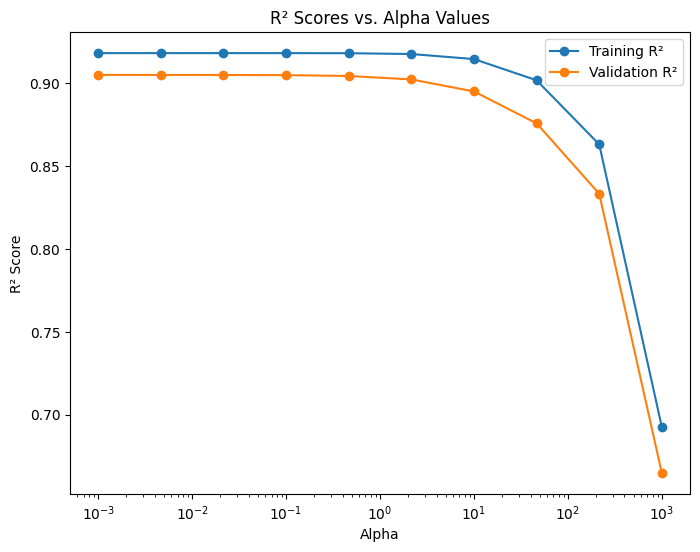

In [115]:
# Define alpha values (logarithmic scale)
alpha_values = np.logspace(-3, 3, 10)  # 0.001 to 1000
train_scores = []
val_scores = []

# Train and evaluate models
for alpha in alpha_values:
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train_scaled, y_train)
    train_scores.append(r2_score(y_train, model.predict(X_train_scaled)))
    val_scores.append(r2_score(y_val, model.predict(X_val_scaled)))

# Plot R² scores vs. Alpha values
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, train_scores, label="Training R²", marker='o')
plt.plot(alpha_values, val_scores, label="Validation R²", marker='o')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("R² Scores vs. Alpha Values")
plt.legend()
plt.show()

# Find the best alpha
best_alpha_index = np.argmax(val_scores)
best_alpha = alpha_values[best_alpha_index]
best_model = Ridge(alpha=best_alpha, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
test_score = r2_score(y_test, best_model.predict(X_test_scaled))

In [116]:
print(f"Best alpha: {best_alpha}")
print(f"Validation R² Score: {val_scores[best_alpha_index]}")
print(f"Test R² Score: {test_score}")

Best alpha: 0.001
Validation R² Score: 0.9050265244755586
Test R² Score: 0.9195873678178336


---

### **3. Make one final evaluation on the test data**

In [117]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_nmse = test_mse / np.var(y_test)  # Normalized Mean Squared Error

# Print performance metrics
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test NMSE: {test_nmse:.4f}")

Test R² Score: 0.9196
Test MSE: 7.9021
Test NMSE: 0.0804


---

### **4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?**

In [118]:
# Feature names for interpretability
feature_names = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", 
                 "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]

# Retrieve coefficients and intercept
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": best_model.coef_
})

print("Best Model Coefficients and Intercept:")
print(coef_df)
print(f"Intercept: {best_model.intercept_:.4f}")

# Compute R² scores
train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
val_r2 = val_scores[np.argmax(val_scores)]  # Best validation R^2 from earlier
test_r2 = r2_score(y_test, best_model.predict(X_test_scaled))

print("\nModel Accuracy Metrics:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Validation R² Score: {val_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Best Model Coefficients and Intercept:
                     Feature  Coefficient
0       Relative Compactness    -6.306017
1               Surface Area    -3.445962
2                  Wall Area     0.838132
3                  Roof Area    -3.740557
4             Overall Height     7.279288
5                Orientation    -0.020007
6               Glazing Area     2.701373
7  Glazing Area Distribution     0.376468
Intercept: 22.0800

Model Accuracy Metrics:
Training R² Score: 0.9182
Validation R² Score: 0.9050
Test R² Score: 0.9196


---

### **5. What are the top 5 features among X1 to X8?**

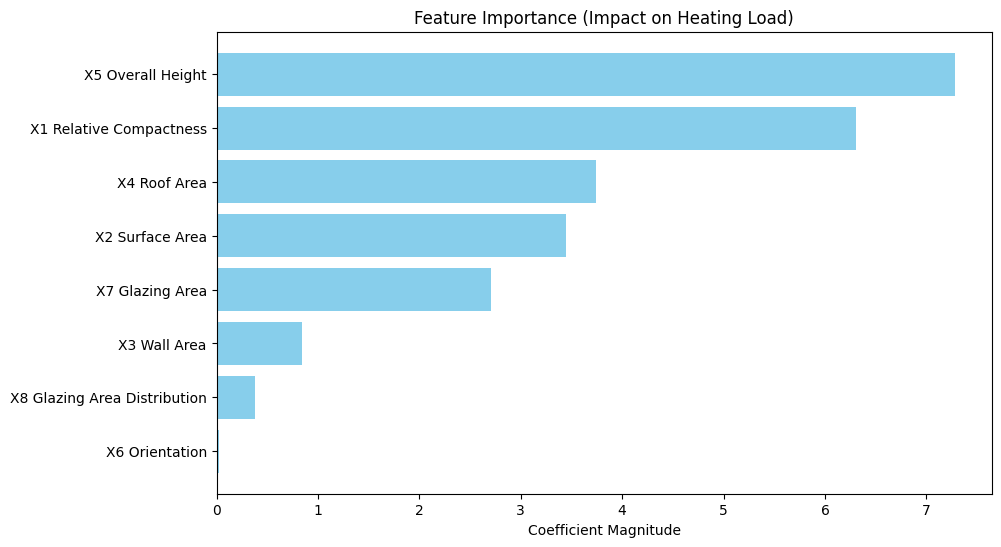

In [119]:
# Feature names
features = ["X1 Relative Compactness", "X2 Surface Area", "X3 Wall Area", "X4 Roof Area", 
            "X5 Overall Height", "X6 Orientation", "X7 Glazing Area", "X8 Glazing Area Distribution"]

# Compute feature importance
feature_importance = np.abs(best_model.coef_)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance (Impact on Heating Load)")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


In [120]:
# Get the top 5 features
top_features = sorted_features[:5]
top_importance = sorted_importance[:5]

# Display the top 5 features with their coefficients
print("\nTop 5 Features (by Coefficient Magnitude):")
for feature, importance in zip(top_features, top_importance):
    print(f"{feature}: {importance:.4f}")



Top 5 Features (by Coefficient Magnitude):
X5 Overall Height: 7.2793
X1 Relative Compactness: 6.3060
X4 Roof Area: 3.7406
X2 Surface Area: 3.4460
X7 Glazing Area: 2.7014


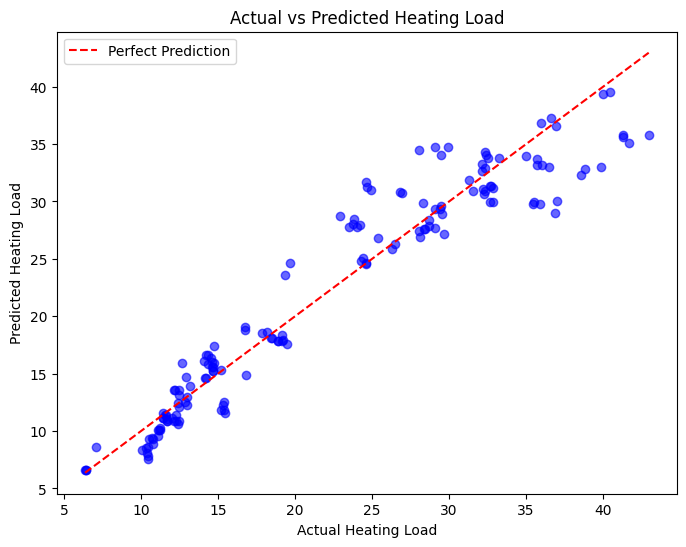

In [121]:
# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.legend()
plt.show()

---

### **6. If you repeat the procedure above using only the 5 top features, what are the results?**

**6A. Splitting the Samples**

In [122]:
# Split the dataset into features (X) and target (y)
X = energy_data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]  # Features X1 to X8
y = energy_data['Y1']  # Assuming 'Y1' is the target column

# List of top 5 feature names (corresponding to the features you provided)
top_5_features = ['X5', 'X1', 'X4', 'X2', 'X7']  # These correspond to your top 5 features

# Subset the data to include only the top 5 features by column names
X_top5 = X[top_5_features]

# Split the data into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X_top5, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


**6B. Using Ridge Regularization with 10 Different Alpha Values**

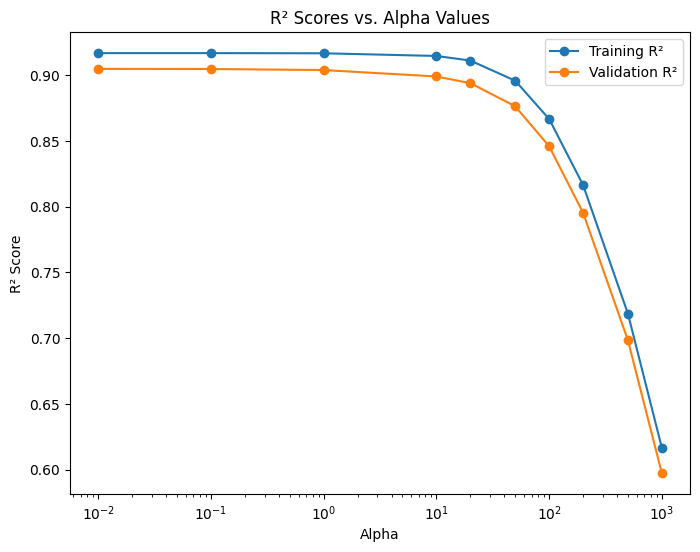

In [123]:
# Define the alpha values to try
alpha_values = [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500, 1000]
train_scores = []
val_scores = []

# Train the Ridge regression model with different alpha values
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    train_scores.append(r2_score(y_train, model.predict(X_train_scaled)))
    val_scores.append(r2_score(y_val, model.predict(X_val_scaled)))

# Plotting training and validation scores to find the best alpha visually
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, train_scores, label="Training R²", marker='o')
plt.plot(alpha_values, val_scores, label="Validation R²", marker='o')
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("R² Scores vs. Alpha Values")
plt.legend()
plt.show()

In [124]:
# Find the best alpha based on the highest validation score
best_alpha = alpha_values[np.argmax(val_scores)]
print(f"Best alpha: {best_alpha}")

Best alpha: 0.01


---

**6C. Final Evaluation on the Test Data**

In [125]:
# Train the model with the best alpha
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_scaled)

# Calculate R², MSE, and NMSE
from sklearn.metrics import mean_squared_error

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_nmse = test_mse / np.var(y_test)

print(f"Test R²: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test NMSE: {test_nmse:.4f}")


Test R²: 0.9195
Test MSE: 7.9128
Test NMSE: 0.0805


**6D. Best Model’s Coefficients, Intercept, and Accuracy**

In [126]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# List of feature names for interpretability (corresponding to your top 5 features)
top_5_features_names = ["Overall Height", "Relative Compactness", "Roof Area", "Surface Area", "Glazing Area"]

# Initialize the Ridge model with the best alpha (assuming best_alpha is determined from previous steps)
best_model = Ridge(alpha=best_alpha)

# Fit the best model on the training data
best_model.fit(X_train_scaled, y_train)

# Retrieve coefficients and intercept
coef_df = pd.DataFrame({
    "Feature": top_5_features_names,
    "Coefficient": best_model.coef_
})

# Display coefficients and intercept
print("Best Model Coefficients and Intercept:")
print(coef_df)
print(f"Intercept: {best_model.intercept_:.4f}")

# Compute R² scores
train_r2 = r2_score(y_train, best_model.predict(X_train_scaled))
val_r2 = r2_score(y_val, best_model.predict(X_val_scaled))
test_r2 = r2_score(y_test, best_model.predict(X_test_scaled))

# Display model accuracy metrics
print("\nModel Accuracy Metrics:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Validation R² Score: {val_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Best Model Coefficients and Intercept:
                Feature  Coefficient
0        Overall Height     7.280260
1  Relative Compactness    -6.280831
2             Roof Area    -5.460913
3          Surface Area    -1.752011
4          Glazing Area     2.771675
Intercept: 22.0800

Model Accuracy Metrics:
Training R² Score: 0.9168
Validation R² Score: 0.9048
Test R² Score: 0.9195


**6E. Top 5 Features**

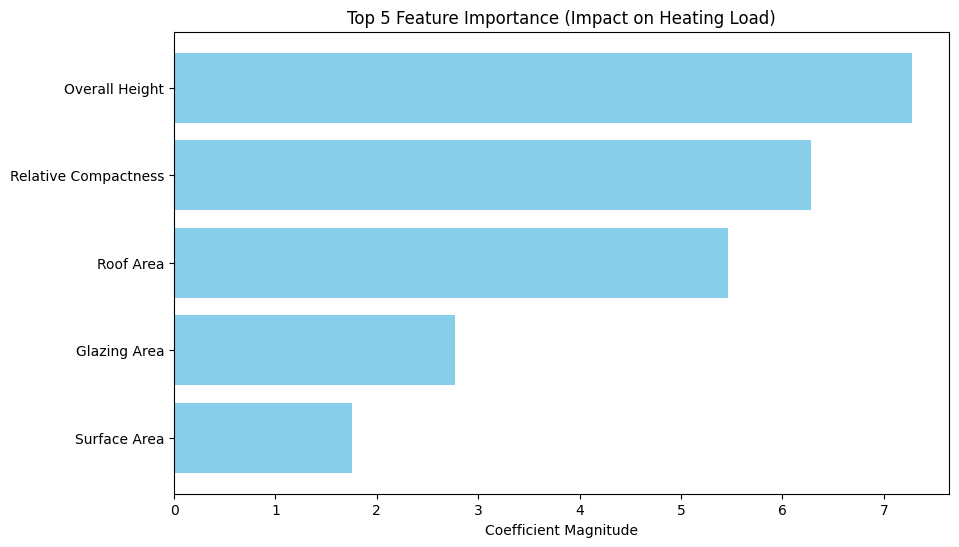

In [127]:
# List of feature names for the top 5 features (matching your provided list)
top_5_features = ["Overall Height", "Relative Compactness", "Roof Area", "Surface Area", "Glazing Area"]

# Compute feature importance (absolute value of coefficients)
feature_importance = np.abs(best_model.coef_)

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [top_5_features[i] for i in sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel("Coefficient Magnitude")
plt.title("Top 5 Feature Importance (Impact on Heating Load)")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

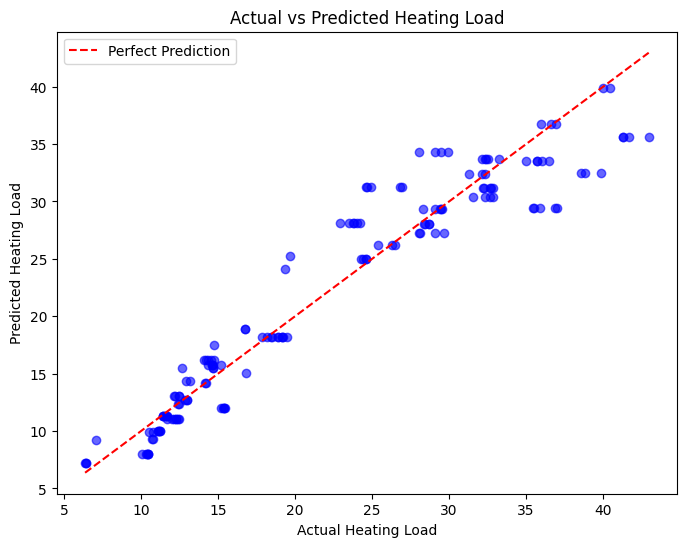

In [128]:
# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.legend()
plt.show()

---

### **Guide Questions**

### **1. What is the impact of removing certain features on the model’s performance?**
- Removing certain features can have a significant impact on the model's performance especially if the features with high coefficient magnitudes are removed since this will decrease the predictive power of the model, which will result in lower R² scores, and higher errors for both MSE and NMSE. On the other hand, removing less important features can simplify the model and make it more interpretable without degrading its performance.

### **2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**
- Splitting the data into training, validation, and test sets is important to make sure the model learns properly and generalizes well. The training set is used to train the model, while the validation set helps in tuning the model’s parameters without overfitting to the training data. The test set is for the final evaluation, ensuring the model performs well on unseen data. If this step is skipped, the model might overfit, meaning it performs well only on the training data and poorly on new data. It could also lead to a biased evaluation, making the model seem better than it actually is.

### **3. How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**
- To assess the model's ability to generalize, we use the test data to check how well the model performs on unseen data. The test set is important because it gives us an idea of the model's real-world performance. To ensure good generalization, we should split the data into training, validation, and test sets properly. Also, cross-validation helps us see if the model consistently works well across different data. Regularization methods like Ridge can help avoid overfitting, and monitoring both training and validation performance can show if the model is overfitting. Lastly, testing on unseen data helps simulate how the model will do in actual use.